# Music type recognition

In this notebook, we will use the [Music Beat](https://www.kaggle.com/insiyeah/musicfeatures) data set to experiment with the Support Vector Machine classification algorithm.

In [1]:
# boilerplate imports

# data exploration
import pandas as pd
import numpy as np
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

**Important**

There are 2 datasets:
- The first is for binary classification
- The second is for multiclass classification (10 classes).

# Binary classification

In [2]:
binary_df = pd.read_csv("musicfeatures/data_2genre.csv", index_col="filename")
print(binary_df.shape)
binary_df.head()

(200, 29)


,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
filename,,,,,,,,,,,,,,,,,,,,,
pop.00024.au,117.453835,57,0.410990,0.207584,3301.781785,3175.656592,7302.597509,0.144527,-40.802069,61.522054,...,-0.568772,0.552448,-1.981371,1.915755,0.076505,-1.270496,1.233082,1.493700,0.949931,1
pop.00099.au,78.302557,38,0.360462,0.138195,2765.747194,3222.713605,6873.391771,0.096015,-119.320605,85.941142,...,1.566938,-2.932391,-1.609138,-0.200545,-2.429376,1.207988,5.848729,1.609469,7.580263,1
pop.00009.au,107.666016,50,0.454810,0.159711,3279.877315,3026.391118,6953.099622,0.172819,-35.277026,61.242109,...,-0.518891,0.212918,-1.294660,-0.105626,-1.245879,-2.528455,0.571032,1.569434,-1.724873,1
pop.00078.au,103.359375,52,0.454698,0.223419,3124.176350,2970.320532,6618.134981,0.142721,-42.757179,62.799474,...,3.020176,-1.242321,-3.524069,-0.325165,-1.443294,-1.864617,-0.031307,-0.729631,-0.987611,1
pop.00037.au,103.359375,51,0.451668,0.240985,3236.413205,2953.596262,6698.776160,0.164825,4.821123,64.495215,...,1.753352,3.336132,2.352307,1.428845,-0.604926,-2.185691,-1.602394,-0.612146,-4.050126,1


In [3]:
# binary_df.dtypes

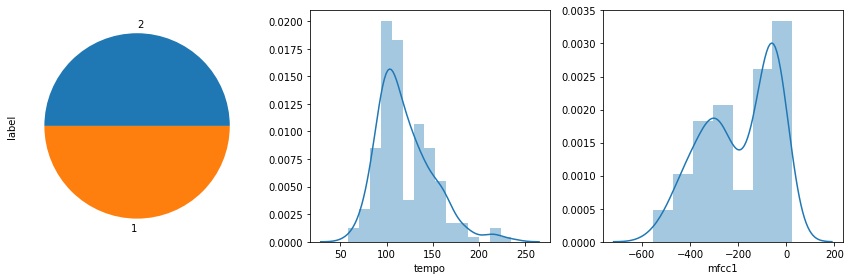

In [4]:
fig, ax =plt.subplots(1,3, figsize=(12,4))
binary_df["label"].value_counts().plot.pie(ax = ax[0])
sns.distplot(binary_df["tempo"], ax=ax[1])
sns.distplot(binary_df["mfcc1"], ax=ax[2])
plt.tight_layout()

Notes:
- Dataset is balanced
- Data will probably need to be normalized

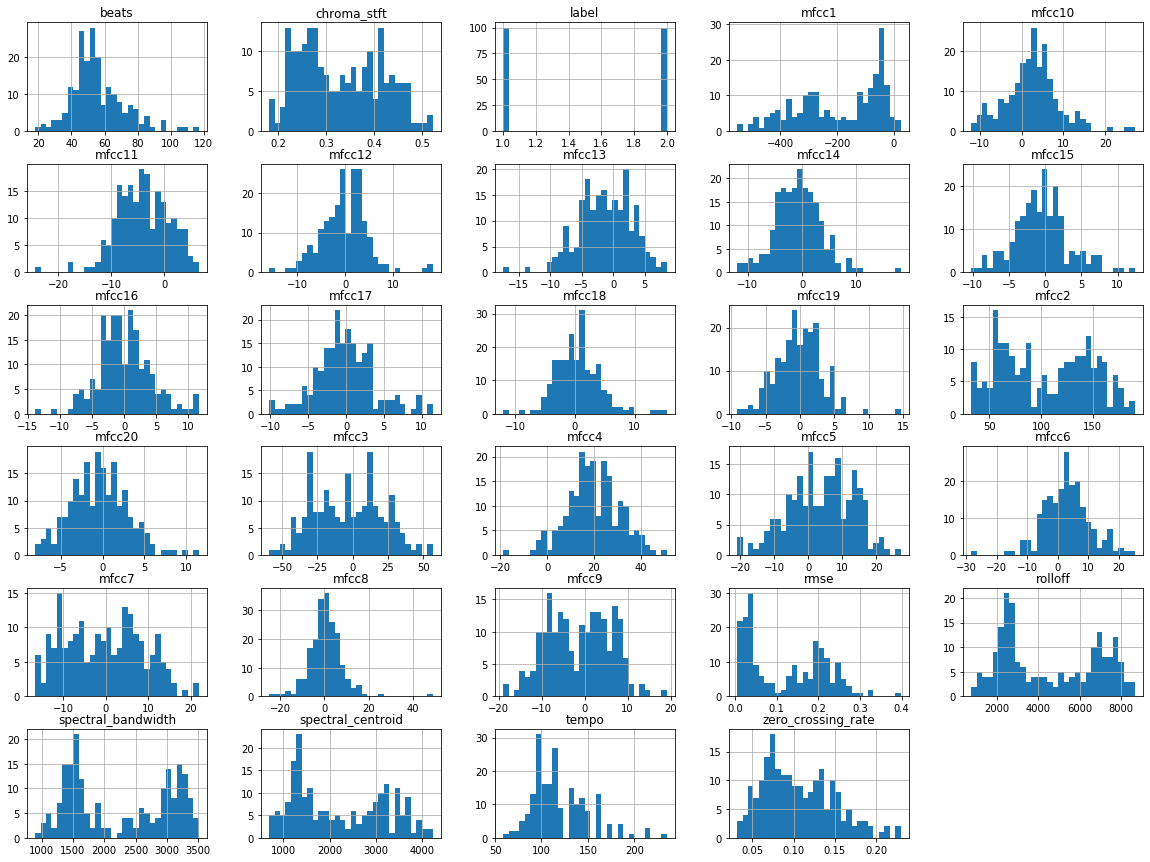

In [5]:
binary_df.hist(bins=30, figsize=(20,15))
plt.show()

In [6]:
# Let's 
## - define X and y
## - split the dataset between train and test

X = binary_df.drop(["label"], axis="columns")
y = binary_df["label"]

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
# Let's now instantiate an SVM model and fit it

from sklearn import svm
from sklearn.metrics import accuracy_score

classifier = svm.SVC(kernel="linear", random_state=1)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [8]:
# perfs
train_preds = classifier.predict(X_train)
train_acc = accuracy_score(train_preds, y_train)
print("Accuracy on training set: %0.2f" % (train_acc))

valid_preds = classifier.predict(X_valid)
valid_acc = accuracy_score(valid_preds, y_valid)
print("Accuracy on validation set: %0.2f" % (valid_acc))

Accuracy on training set: 1.00
Accuracy on validation set: 0.98


Almost perfect precision ! Let's see if it works as well on a 10-class dataset.

# Multiclass

In [9]:
df = pd.read_csv("musicfeatures/data.csv", index_col="filename")
# print(raw_df.dtypes)
df.head(3)

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
filename,,,,,,,,,,,,,,,,,,,,,
blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues


Let's notice that the labels, this time, are **strings**.

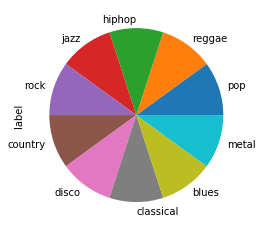

In [10]:
df["label"].value_counts().plot.pie();

In [11]:
X = df.drop(["label"], axis="columns")
y = df["label"]

# Normalize numerical inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [12]:
clf = svm.SVC(kernel="linear")
clf.fit(X_train, y_train)

# perfs
train_preds = clf.predict(X_train)
train_acc = accuracy_score(train_preds, y_train)
print("Accuracy on training set: %0.2f" % (train_acc))

valid_preds = clf.predict(X_valid)
valid_acc = accuracy_score(valid_preds, y_valid)
print("Accuracy on validation set: %0.2f" % (valid_acc))

Accuracy on training set: 0.80
Accuracy on validation set: 0.63
